In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans

In [72]:
df=pd.read_csv('/content/Iris.csv')

In [73]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [76]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

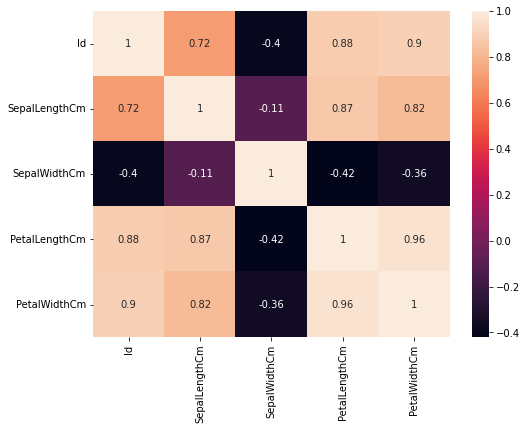

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

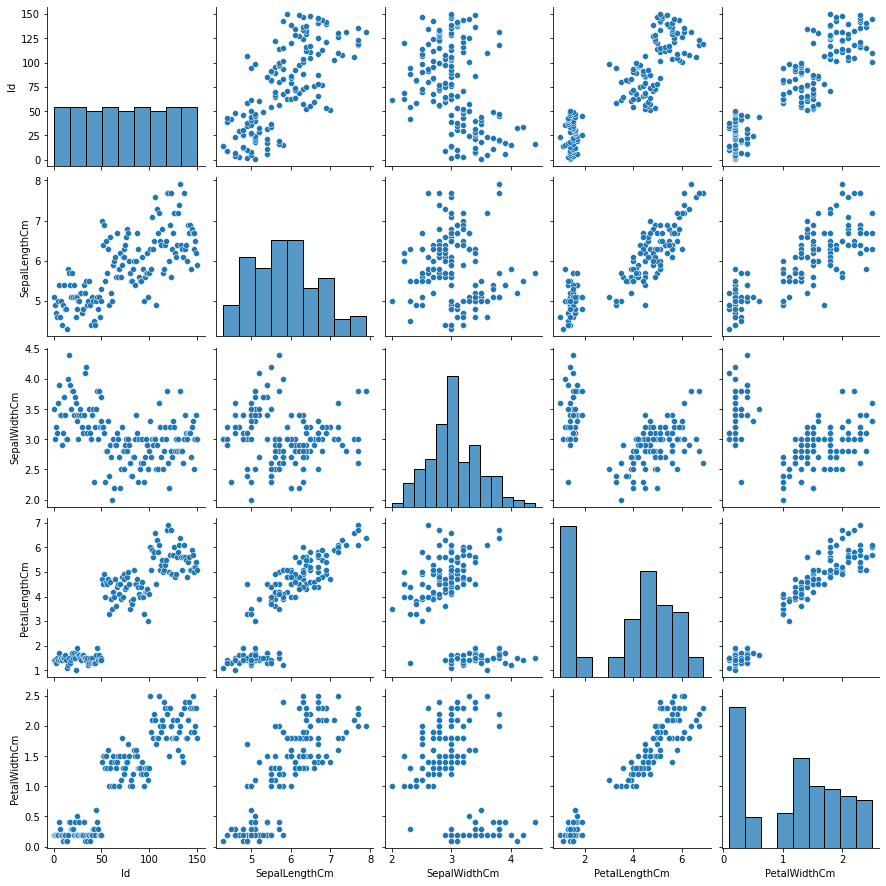

In [78]:
sns.pairplot(df)

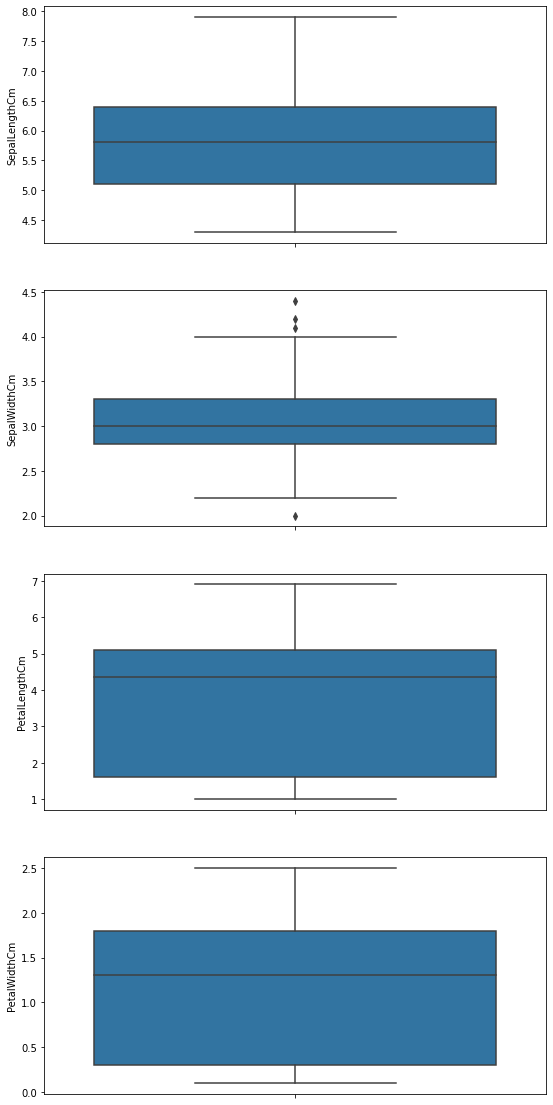

In [79]:
columns=df.columns[1:5]
fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(9,20))
for i in range(len(columns)):
    sns.boxplot(ax=axes[i],y=columns[i],data=df)

In [80]:
def outlier_treatment(data):
    q1,q3=data.quantile([.25,.75])
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    return lower,upper

In [82]:
for col in df.columns[1:5]:
    low,up=outlier_treatment(df[col])
    df[col]=np.clip(df[col],a_min=low,a_max=up)

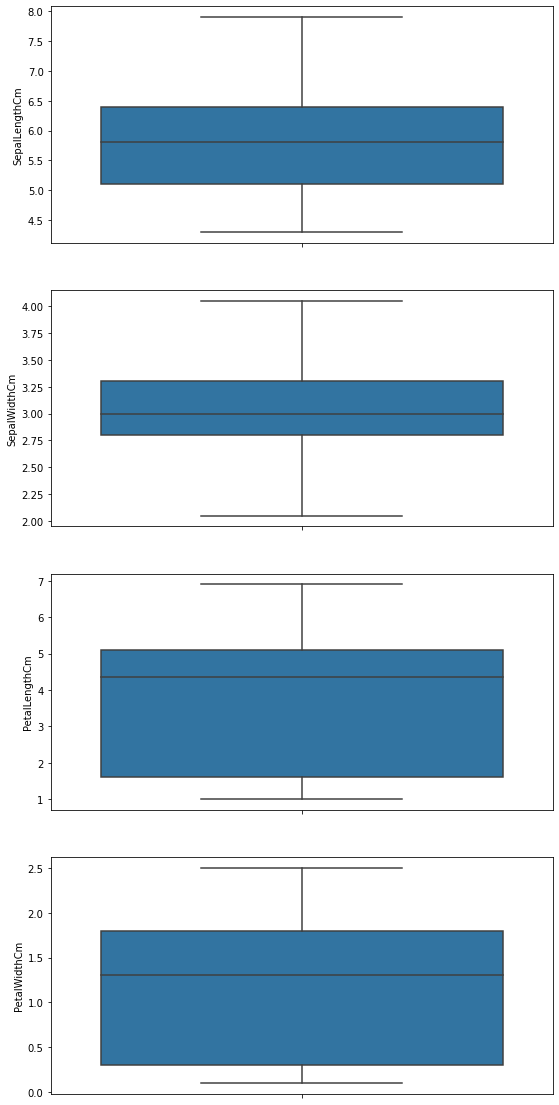

In [83]:
columns=df.columns[1:5]
fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(9,20))
for i in range(len(columns)):
    sns.boxplot(ax=axes[i],y=columns[i],data=df)

In [87]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [88]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
X=df.iloc[:,1:]
X

In [90]:
k_means=KMeans(n_clusters=3,random_state=123)
k_means_pred=k_means.fit_predict(X)
k_means_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [91]:
df['K_Means_Clusters']=k_means_pred

In [92]:
df['K_Means_Clusters'].value_counts()

2    51
1    50
0    49
Name: K_Means_Clusters, dtype: int64

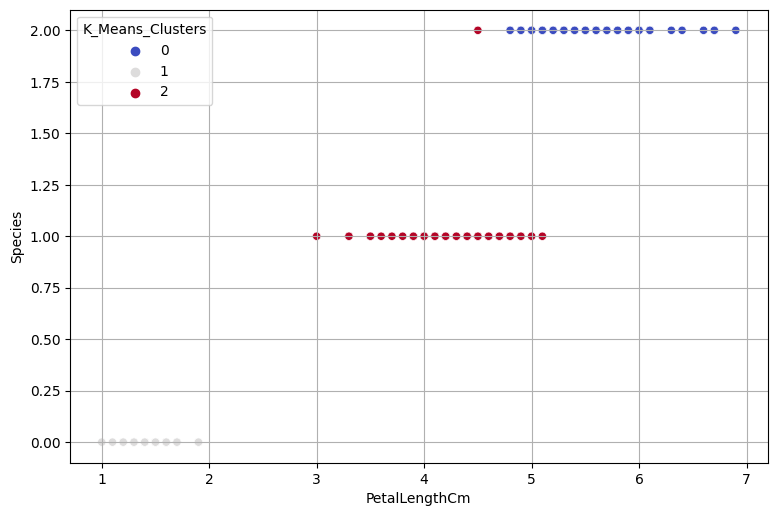

In [93]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='PetalLengthCm',y='Species',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()


In [94]:
df.Species.unique()

array([0, 1, 2])

In [95]:
df['K_Means_Clusters'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'},inplace=True)

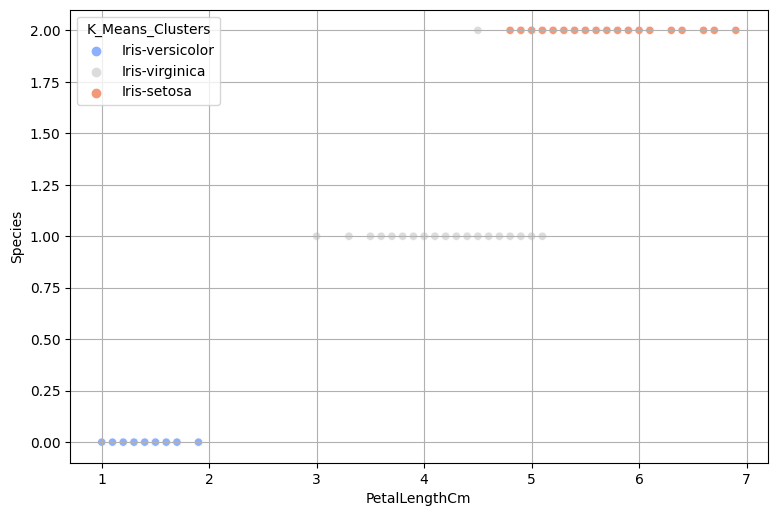

In [96]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='PetalLengthCm',y='Species',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()


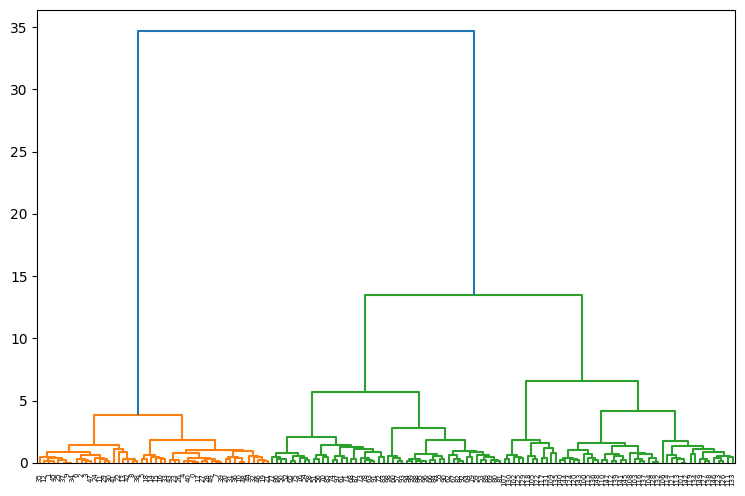

In [98]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(9,6),dpi=100)
dendrogram(linkage(X,method='ward',metric='euclidean'))
plt.show()

In [99]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc_pred=hc.fit_predict(X)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
df['HC_Clusters']=hc_pred

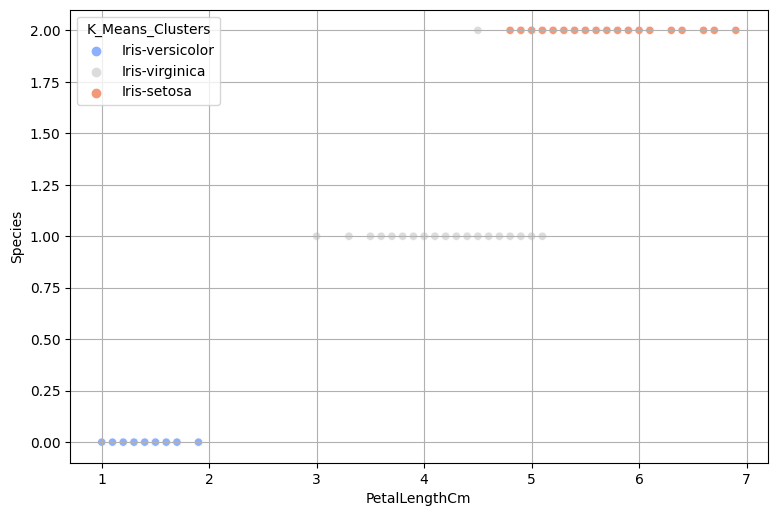

In [101]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='PetalLengthCm',y='Species',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()

In [102]:
df['K_Means_Clusters'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'},inplace=True)

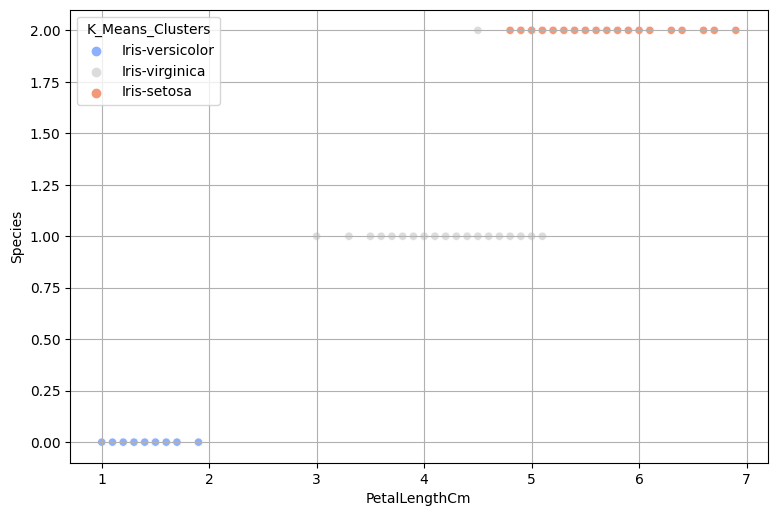

In [103]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df,x='PetalLengthCm',y='Species',hue='K_Means_Clusters',palette="coolwarm")
plt.grid()